In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [2]:
class ML_Trombone(thinkdsp.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.
 
        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts)-1)
        freqs = 1 / lengths
        return self._evaluate(ts, freqs)

In [3]:
low=  220 #262
high= 440 #349
signal = ML_Trombone(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

In [4]:
signal = ML_Trombone(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

In [5]:
wave = wave1 | wave2  | wave2 | wave1 | wave1 | wave2  | wave2 | wave1
wave.make_audio()

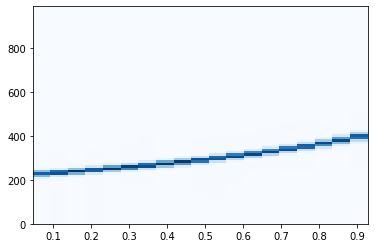

In [6]:
sp = wave2.make_spectrogram(int(1024))
sp.plot(high=1000)